In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ahu01 = pd.read_csv('AHU_01.csv')
ahu01 = ahu01.ffill()

In [3]:
ahu01.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
0,31-12-2015,00:00:00,0.0,46.0,OFF,ON,OFF,8.1,50.0,0.0,ON,48.0,0.0
1,31-12-2015,00:00:00,0.0,44.3,OFF,ON,OFF,27.9,50.0,0.0,ON,47.4,0.0
2,31-12-2015,00:05:00,0.0,44.3,OFF,ON,OFF,27.9,50.0,0.0,ON,47.4,0.0
3,31-12-2015,00:10:00,0.0,44.3,OFF,ON,OFF,27.9,50.0,0.0,ON,47.4,0.0
4,31-12-2015,00:15:00,0.0,43.8,OFF,ON,OFF,44.5,50.0,0.0,ON,48.0,0.0


In [4]:
ahu01.rename(columns={'Column1': 'Date', 'Column2': 'Time', 'Column3':'Cooling coil %open', 'Column4' : 'Discharger temp'},inplace=True)
ahu01.rename(columns={'Column5':'exhaust fan1', 'Column6': 'exhaust fan2', 'Column7': 'exhaust fan3'},inplace=True)
ahu01.rename(columns={'Column8':'Face bypass damper', 'Column9':'Heating coil valve', 'Column10': 'Humidity valve'},inplace=True)
ahu01.rename(columns={'Column11': 'Supply fan status','Column12': 'Heating coil discharger temp', 'Column13':'Supply fan %'},inplace=True)

In [5]:
ahu01.head()

,Date,Time,Cooling coil %open,Discharger temp,exhaust fan1,exhaust fan2,exhaust fan3,Face bypass damper,Heating coil valve,Humidity valve,Supply fan status,Heating coil discharger temp,Supply fan %
0,31-12-2015,00:00:00,0.0,46.0,OFF,ON,OFF,8.1,50.0,0.0,ON,48.0,0.0
1,31-12-2015,00:00:00,0.0,44.3,OFF,ON,OFF,27.9,50.0,0.0,ON,47.4,0.0
2,31-12-2015,00:05:00,0.0,44.3,OFF,ON,OFF,27.9,50.0,0.0,ON,47.4,0.0
3,31-12-2015,00:10:00,0.0,44.3,OFF,ON,OFF,27.9,50.0,0.0,ON,47.4,0.0
4,31-12-2015,00:15:00,0.0,43.8,OFF,ON,OFF,44.5,50.0,0.0,ON,48.0,0.0


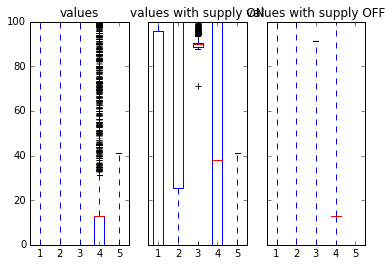

In [7]:
data_percent = [ahu01['Cooling coil %open'], ahu01['Face bypass damper'], ahu01['Supply fan %'], 
                ahu01['Heating coil valve'], ahu01['Humidity valve']]
sup_on = ahu01[ahu01['Supply fan status'].str.contains('ON')]
sup_off = ahu01[ahu01['Supply fan status'].str.contains('OFF')]
data_percent_1 = [sup_on['Cooling coil %open'],sup_on['Face bypass damper'],sup_on['Supply fan %'],
                  sup_on['Heating coil valve'], sup_on['Humidity valve']]
data_percent_2 = [sup_off['Cooling coil %open'],sup_off['Face bypass damper'],sup_off['Supply fan %'],
                  sup_off['Heating coil valve'], sup_off['Humidity valve']]
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
ax1.boxplot(data_percent)
ax2.boxplot(data_percent_1)
ax3.boxplot(data_percent_2)
ax1.set_title('values')
ax2.set_title('values with supply ON')
ax3.set_title('values with supply OFF')
#plt.show()
plt.savefig(''.join(['values%','_ahu_01']))


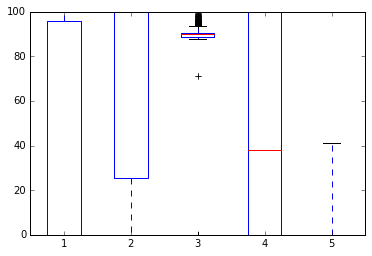

In [59]:

plt.boxplot(data_percent_1)
#plt.show()
plt.savefig(''.join(['value_sup_on','ahu_01']))

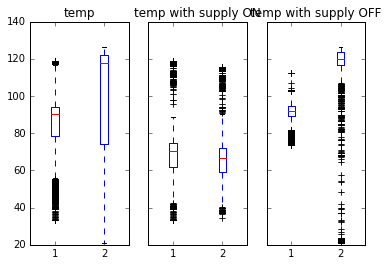

In [8]:
data_temp = [ahu01['Discharger temp'], ahu01['Heating coil discharger temp']]
data_temp_1 = [sup_on['Discharger temp'],sup_on['Heating coil discharger temp']]
data_temp_2 = [sup_off['Discharger temp'],sup_off['Heating coil discharger temp']]
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
ax1.boxplot(data_temp)
ax2.boxplot(data_temp_1)
ax3.boxplot(data_temp_2)
ax1.set_title('temp')
ax2.set_title('temp with supply ON')
ax3.set_title('temp with supply OFF')
#plt.show()
plt.savefig(''.join(['temperature','_ahu_01']))

In [ ]:
data_temp_sup = [sup_on['Discharger temp'],sup_on['Heating coil discharger temp']]
plt.boxplot(data_temp_sup)
#plt.show()
plt.savefig(''.join(['temp_sup_on','_ahu01']))

In [10]:
df1 = ahu01.copy()
print ahu01.columns.values
df1 = df1.drop(['Date','Time', 'exhaust fan1','exhaust fan2','exhaust fan3','Supply fan status','Face bypass damper' ],1)
print df1.columns.values

['Date' 'Time' 'Cooling coil %open' 'Discharger temp' 'exhaust fan1'
 'exhaust fan2' 'exhaust fan3' 'Face bypass damper' 'Heating coil valve'
 'Humidity valve' 'Supply fan status' 'Heating coil discharger temp'
 'Supply fan %']
['Cooling coil %open' 'Discharger temp' 'Heating coil valve'
 'Humidity valve' 'Heating coil discharger temp' 'Supply fan %']


In [ ]:
df = pd.scatter_matrix(df1, alpha = 0.2, figsize = (25,25), diagonal = 'kde')
#df.plot()
plt.savefig(''.join(['bivariate','_ahu_01']))